In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [22]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv')

### Pre-processing

In [23]:
df.drop('Serial No.', axis = 1, inplace = True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [24]:
s_cols=[]
for i in df.columns:
    x=i.strip()
    s_cols.append(x)
df.columns = s_cols

In [25]:
# Summary statistics
df.describe()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# EDA

### Univariate Analysis

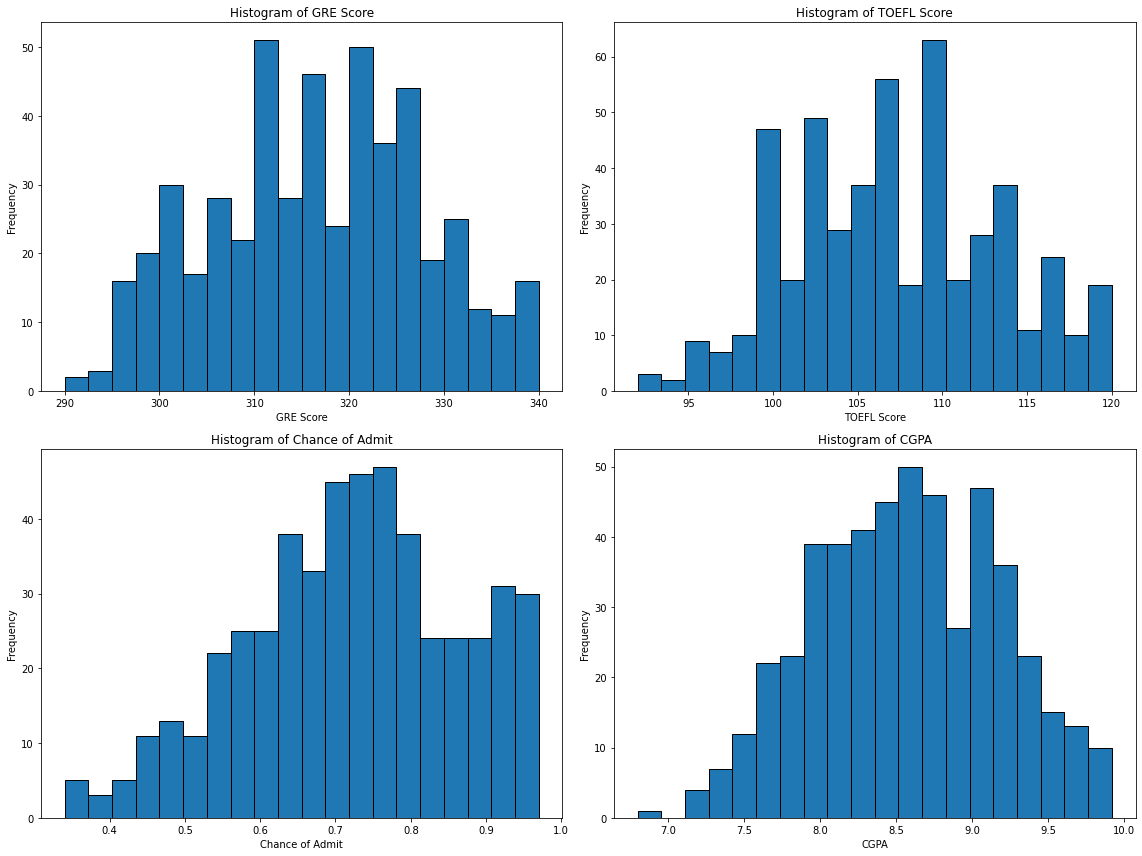

In [26]:
# Univariate EDA for numerical variables
numerical_columns = ['GRE Score', 'TOEFL Score', 'Chance of Admit', 'CGPA']

# Create subplots for histograms
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Plot histograms for each numerical variable
for i, column in enumerate(numerical_columns):
    axs[i].hist(df[column], bins=20, edgecolor='black')
    axs[i].set_title(f'Histogram of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [27]:
df['University Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

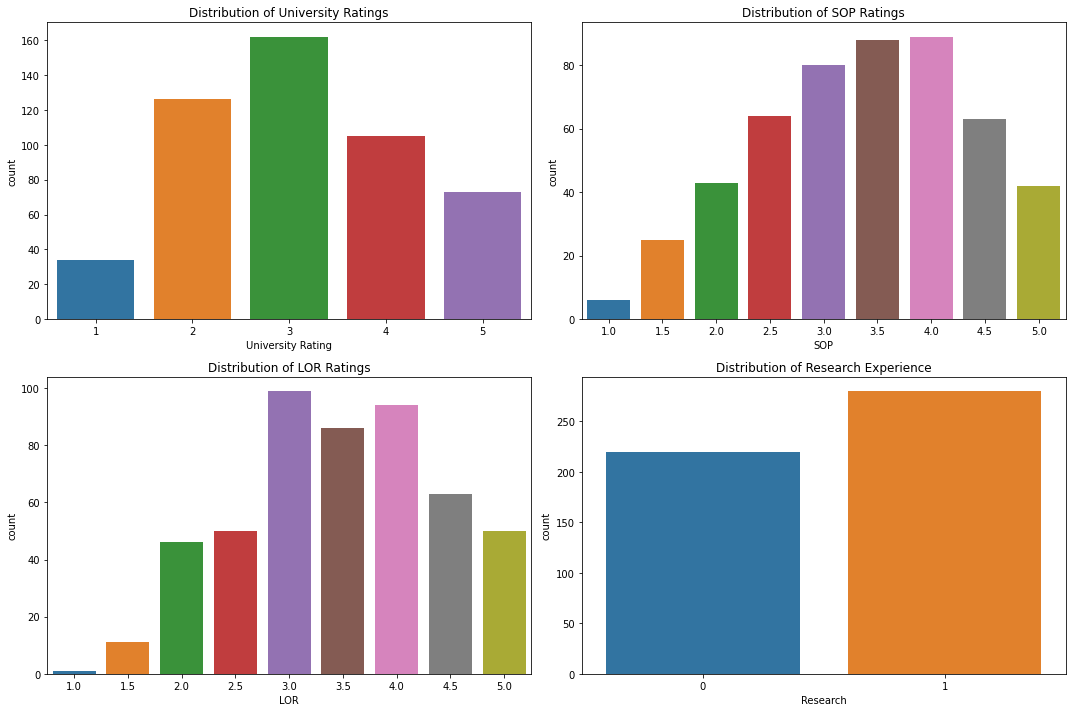

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Bar plot for University Rating
sns.countplot(x='University Rating', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of University Ratings')

# Bar plot for SOP
sns.countplot(x='SOP', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of SOP Ratings')

# Bar plot for LOR
sns.countplot(x='LOR', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of LOR Ratings')

# Bar plot for Research
sns.countplot(x='Research', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Research Experience')

plt.tight_layout()
plt.show()

## Bivariate Analysis

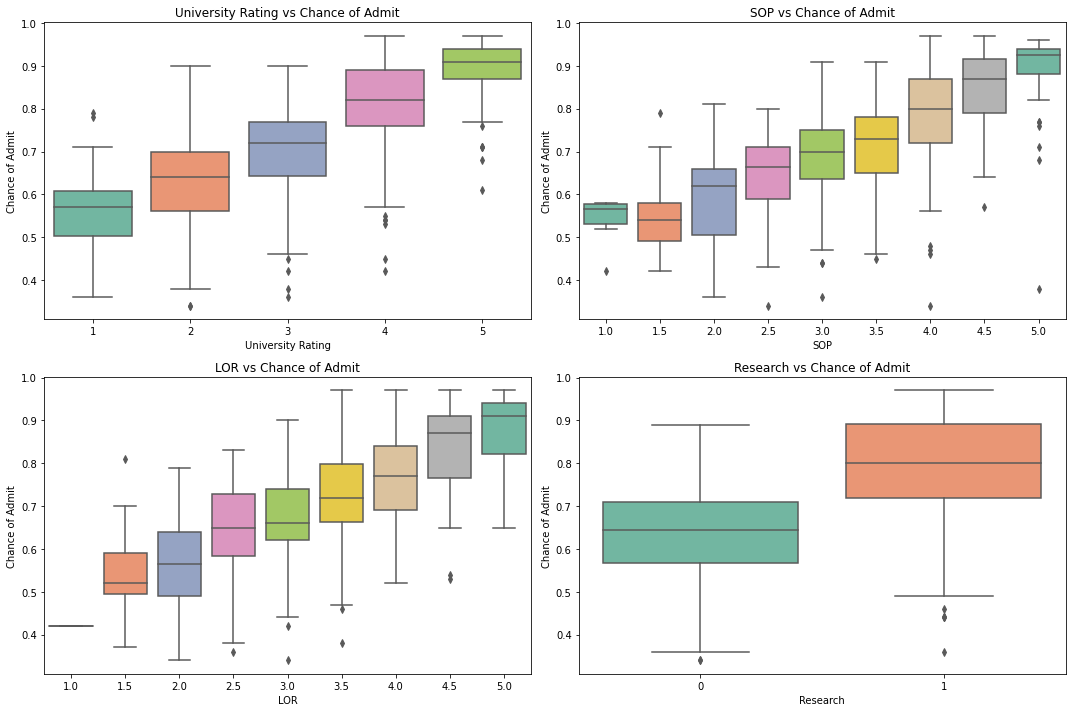

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Boxplot for University Rating
sns.boxplot(x='University Rating', y='Chance of Admit', data=df, ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('University Rating vs Chance of Admit')

# Boxplot for SOP
sns.boxplot(x='SOP', y='Chance of Admit', data=df, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('SOP vs Chance of Admit')

# Boxplot for LOR
sns.boxplot(x='LOR', y='Chance of Admit', data=df, ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('LOR vs Chance of Admit')

# Boxplot for Research
sns.boxplot(x='Research', y='Chance of Admit', data=df, ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Research vs Chance of Admit')

plt.tight_layout()
plt.show()


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

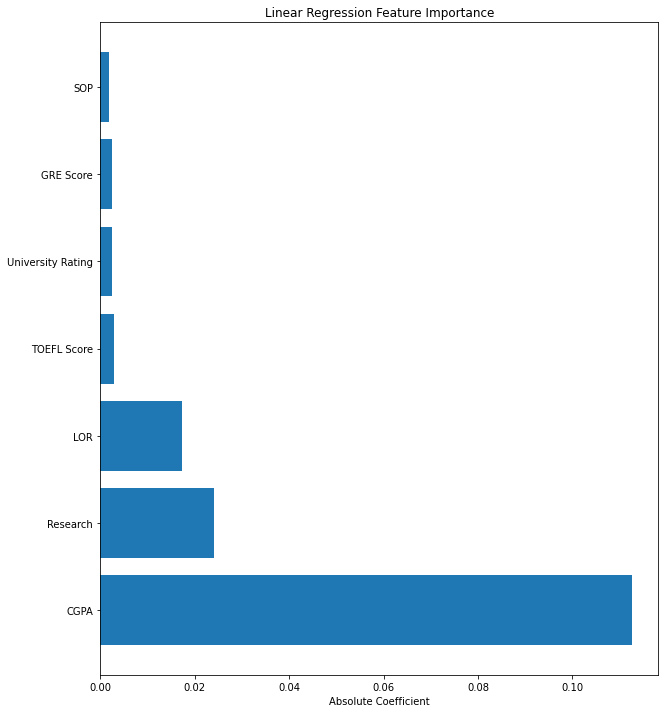

In [31]:
X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get feature names and corresponding coefficients
feature_names = X.columns
coefficients = model.coef_

# Create a DataFrame to display feature names and their coefficients
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance_df['Absolute Coefficient'] = np.abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 12))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Absolute Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Linear Regression Feature Importance')
plt.show()

### Target Encoding

In [32]:
# Calculate the mean of the target variable for each category
means = df.groupby('University Rating')['Chance of Admit'].mean()
df['University Rating'] = df['University Rating'].map(means)

df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,0.801619,4.5,4.5,9.65,1,0.92
1,324,107,0.801619,4.0,4.5,8.87,1,0.76
2,316,104,0.702901,3.0,3.5,8.00,1,0.72
3,322,110,0.702901,3.5,2.5,8.67,1,0.80
4,314,103,0.626111,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,0.888082,4.5,4.0,9.02,1,0.87
496,337,117,0.888082,5.0,5.0,9.87,1,0.96
497,330,120,0.888082,4.5,5.0,9.56,1,0.93
498,312,103,0.801619,4.0,5.0,8.43,0,0.73


In [33]:
means = df.groupby('SOP')['Chance of Admit'].mean()
df['SOP'] = df['SOP'].map(means)

means = df.groupby('LOR')['Chance of Admit'].mean()
df['LOR'] = df['LOR'].map(means)

means = df.groupby('Research')['Chance of Admit'].mean()
df['Research'] = df['Research'].map(means)

df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,0.801619,0.850000,0.831905,9.65,0.789964,0.92
1,324,107,0.801619,0.782809,0.831905,8.87,0.789964,0.76
2,316,104,0.702901,0.678500,0.723023,8.00,0.789964,0.72
3,322,110,0.702901,0.712045,0.640600,8.67,0.789964,0.80
4,314,103,0.626111,0.589535,0.668485,8.21,0.634909,0.65
...,...,...,...,...,...,...,...,...
495,332,108,0.888082,0.850000,0.764149,9.02,0.789964,0.87
496,337,117,0.888082,0.885000,0.872600,9.87,0.789964,0.96
497,330,120,0.888082,0.850000,0.872600,9.56,0.789964,0.93
498,312,103,0.801619,0.782809,0.872600,8.43,0.634909,0.73


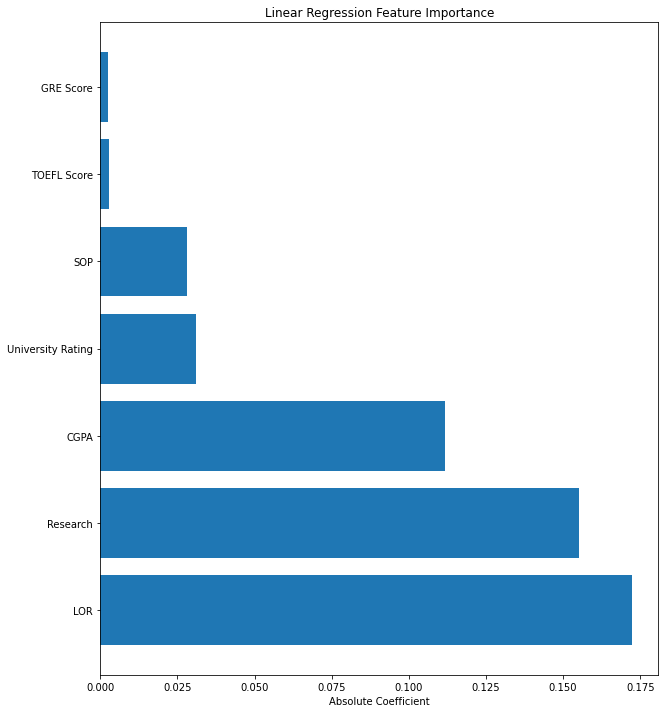

In [34]:
X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get feature names and corresponding coefficients
feature_names = X.columns
coefficients = model.coef_

# Create a DataFrame to display feature names and their coefficients
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance_df['Absolute Coefficient'] = np.abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 12))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Absolute Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Linear Regression Feature Importance')
plt.show()

### Lets see after feature scaling


In [35]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns you want to scale
columns_to_scale = df.columns

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Apply min-max scaling to the selected columns
m_df = df.copy()  # Creating a copy to avoid modifying the original DataFrame
m_df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Now m_df contains the scaled values


In [36]:
m_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.734795,0.899038,0.910086,0.913462,1.0,0.920635
1,0.68,0.535714,0.734795,0.705218,0.910086,0.663462,1.0,0.666667
2,0.52,0.428571,0.432001,0.404327,0.669517,0.384615,1.0,0.603175
3,0.64,0.642857,0.432001,0.501093,0.487406,0.599359,1.0,0.730159
4,0.48,0.392857,0.196465,0.147697,0.549016,0.451923,0.0,0.492063
...,...,...,...,...,...,...,...,...
495,0.84,0.571429,1.000000,0.899038,0.760382,0.711538,1.0,0.841270
496,0.94,0.892857,1.000000,1.000000,1.000000,0.983974,1.0,0.984127
497,0.80,1.000000,1.000000,0.899038,1.000000,0.884615,1.0,0.936508
498,0.44,0.392857,0.734795,0.705218,1.000000,0.522436,0.0,0.619048


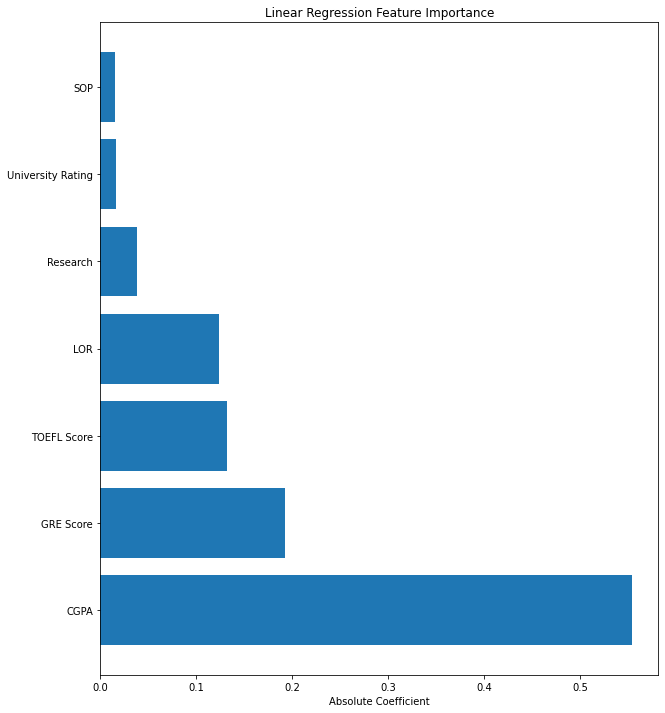

In [37]:
X = m_df.drop('Chance of Admit', axis=1)
y = m_df['Chance of Admit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get feature names and corresponding coefficients
feature_names = X.columns
coefficients = model.coef_

# Create a DataFrame to display feature names and their coefficients
feature_importance_m_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance_m_df['Absolute Coefficient'] = np.abs(feature_importance_m_df['Coefficient'])
feature_importance_m_df = feature_importance_m_df.sort_values(by='Absolute Coefficient', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 12))
plt.barh(feature_importance_m_df['Feature'], feature_importance_m_df['Absolute Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Linear Regression Feature Importance')
plt.show()

<Axes: >

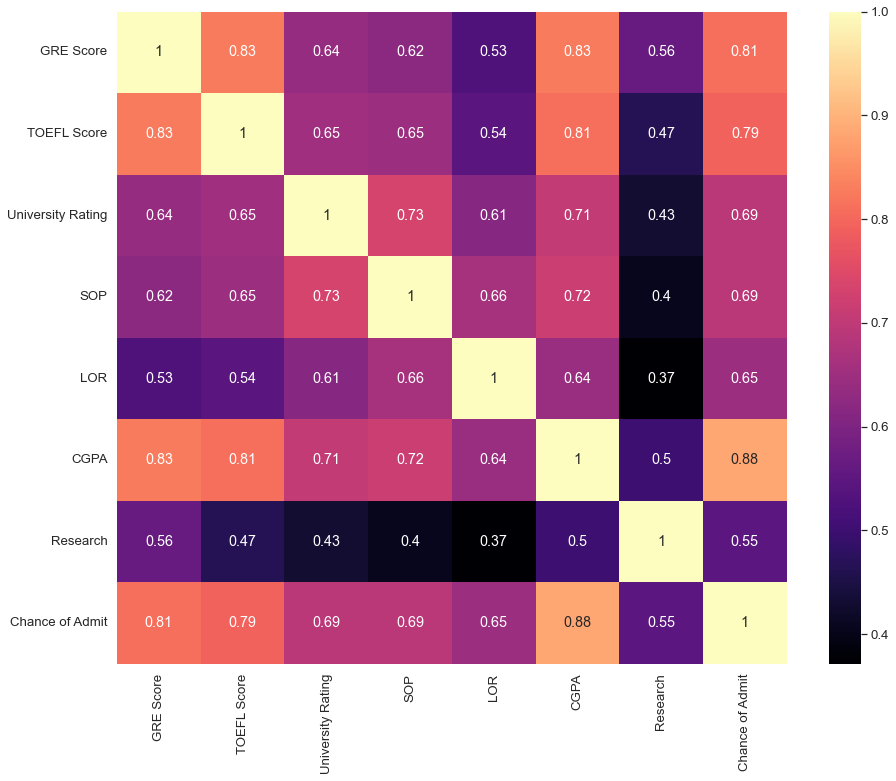

In [52]:
sns.set(font_scale=1.2)
plt.figure(figsize=(15, 12))
sns.heatmap(m_df.corr(), cmap="magma", annot=True)